In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.shape

(7043, 21)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


<Axes: xlabel='Churn'>

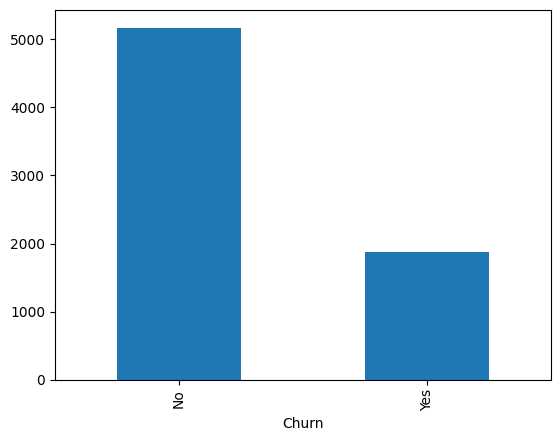

In [7]:
df.Churn.value_counts().plot(kind='bar')
#THe target column is imbalanced

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Feature Engineering

In [9]:
df = df.drop(['customerID'],axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [11]:
df.gender = df.gender.replace(['Male','Female'],[1,0])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,1,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.Partner.unique()

array(['Yes', 'No'], dtype=object)

In [13]:
df.Partner = df.Partner.replace(['Yes','No'],[1,0])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,0,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,1,0,0,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,0,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,0,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df.Dependents.unique()

array(['No', 'Yes'], dtype=object)

In [15]:
df.Dependents = df.Dependents.replace(['No','Yes'],[0,1])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,0,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,1,0,0,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,0,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,0,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df.PhoneService.unique()

array(['No', 'Yes'], dtype=object)

In [17]:
df.PhoneService = df.PhoneService.replace(['No','Yes'],[0,1])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
df.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [19]:
df.MultipleLines = df.MultipleLines.replace(['No phone service', 'No', 'Yes'],[0,1,2])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,0,0,34,1,1,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,1,0,0,0,2,1,1,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,0,0,45,0,0,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,0,0,2,1,1,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [21]:
df.InternetService = df.InternetService.replace(['DSL', 'Fiber optic', 'No'],[1,2,0])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,0,0,34,1,1,1,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,1,0,0,0,2,1,1,1,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,0,0,45,0,0,1,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,0,0,2,1,1,2,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
df.OnlineSecurity.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [23]:
df.OnlineSecurity = df.OnlineSecurity.replace(['No','Yes','No internet service'],[1,2,0])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,1,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,0,0,34,1,1,1,2,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,1,0,0,0,2,1,1,1,2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,0,0,45,0,0,1,2,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,0,0,2,1,1,2,1,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
df.OnlineBackup.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [25]:
df.OnlineBackup = df.OnlineBackup.replace(['Yes', 'No', 'No internet service'],[2,1,0])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,1,2,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,0,0,34,1,1,1,2,1,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,1,0,0,0,2,1,1,1,2,2,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,0,0,45,0,0,1,2,1,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,0,0,2,1,1,2,1,1,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
df.DeviceProtection.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [27]:
df.DeviceProtection = df.DeviceProtection.replace(['No', 'Yes', 'No internet service'],[1,2,0])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,1,2,1,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,0,0,34,1,1,1,2,1,2,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,1,0,0,0,2,1,1,1,2,2,1,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,0,0,45,0,0,1,2,1,2,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,0,0,2,1,1,2,1,1,1,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
df.TechSupport.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [29]:
df.TechSupport = df.TechSupport.replace(['No', 'Yes', 'No internet service'],[1,2,0])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,1,2,1,1,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,0,0,34,1,1,1,2,1,2,1,No,No,One year,No,Mailed check,56.95,1889.5,No
2,1,0,0,0,2,1,1,1,2,2,1,1,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,0,0,45,0,0,1,2,1,2,2,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,0,0,2,1,1,2,1,1,1,1,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
df.StreamingTV.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [31]:
df.StreamingTV = df.StreamingTV.replace(['No', 'Yes', 'No internet service'],[1,2,0])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,1,2,1,1,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,0,0,34,1,1,1,2,1,2,1,1,No,One year,No,Mailed check,56.95,1889.5,No
2,1,0,0,0,2,1,1,1,2,2,1,1,1,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,0,0,45,0,0,1,2,1,2,2,1,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,0,0,2,1,1,2,1,1,1,1,1,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
df.StreamingMovies.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [33]:
df.StreamingMovies = df.StreamingMovies.replace(['No', 'Yes', 'No internet service'],[1,2,0])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,1,2,1,1,1,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,0,0,34,1,1,1,2,1,2,1,1,1,One year,No,Mailed check,56.95,1889.5,No
2,1,0,0,0,2,1,1,1,2,2,1,1,1,1,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,0,0,45,0,0,1,2,1,2,2,1,1,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,0,0,2,1,1,2,1,1,1,1,1,1,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [35]:
df.Contract = df.Contract.replace(['Month-to-month', 'One year', 'Two year'],[0,1,2])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,1,2,1,1,1,1,0,Yes,Electronic check,29.85,29.85,No
1,1,0,0,0,34,1,1,1,2,1,2,1,1,1,1,No,Mailed check,56.95,1889.5,No
2,1,0,0,0,2,1,1,1,2,2,1,1,1,1,0,Yes,Mailed check,53.85,108.15,Yes
3,1,0,0,0,45,0,0,1,2,1,2,2,1,1,1,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,0,0,2,1,1,2,1,1,1,1,1,1,0,Yes,Electronic check,70.70,151.65,Yes


In [36]:
df.PaperlessBilling.unique()

array(['Yes', 'No'], dtype=object)

In [37]:
df.PaperlessBilling = df.PaperlessBilling.replace(['Yes','No'],[1,0])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,1,2,1,1,1,1,0,1,Electronic check,29.85,29.85,No
1,1,0,0,0,34,1,1,1,2,1,2,1,1,1,1,0,Mailed check,56.95,1889.5,No
2,1,0,0,0,2,1,1,1,2,2,1,1,1,1,0,1,Mailed check,53.85,108.15,Yes
3,1,0,0,0,45,0,0,1,2,1,2,2,1,1,1,0,Bank transfer (automatic),42.30,1840.75,No
4,0,0,0,0,2,1,1,2,1,1,1,1,1,1,0,1,Electronic check,70.70,151.65,Yes


In [38]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [39]:
df.PaymentMethod = df.PaymentMethod.replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'],[1,2,3,4])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,1,2,1,1,1,1,0,1,1,29.85,29.85,No
1,1,0,0,0,34,1,1,1,2,1,2,1,1,1,1,0,2,56.95,1889.5,No
2,1,0,0,0,2,1,1,1,2,2,1,1,1,1,0,1,2,53.85,108.15,Yes
3,1,0,0,0,45,0,0,1,2,1,2,2,1,1,1,0,3,42.30,1840.75,No
4,0,0,0,0,2,1,1,2,1,1,1,1,1,1,0,1,1,70.70,151.65,Yes


In [40]:
df.Churn.unique()


array(['No', 'Yes'], dtype=object)

In [41]:
df.Churn = df.Churn.replace(['No','Yes'],[0,1])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,1,2,1,1,1,1,0,1,1,29.85,29.85,0
1,1,0,0,0,34,1,1,1,2,1,2,1,1,1,1,0,2,56.95,1889.5,0
2,1,0,0,0,2,1,1,1,2,2,1,1,1,1,0,1,2,53.85,108.15,1
3,1,0,0,0,45,0,0,1,2,1,2,2,1,1,1,0,3,42.30,1840.75,0
4,0,0,0,0,2,1,1,2,1,1,1,1,1,1,0,1,1,70.70,151.65,1


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [44]:
df.TotalCharges = df.TotalCharges.str.replace(" ''",'')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,1,2,1,1,1,1,0,1,1,29.85,29.85,0
1,1,0,0,0,34,1,1,1,2,1,2,1,1,1,1,0,2,56.95,1889.5,0
2,1,0,0,0,2,1,1,1,2,2,1,1,1,1,0,1,2,53.85,108.15,1
3,1,0,0,0,45,0,0,1,2,1,2,2,1,1,1,0,3,42.30,1840.75,0
4,0,0,0,0,2,1,1,2,1,1,1,1,1,1,0,1,1,70.70,151.65,1


In [45]:
df.TotalCharges = df.TotalCharges.str.replace(" ''",'')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,1,2,1,1,1,1,0,1,1,29.85,29.85,0
1,1,0,0,0,34,1,1,1,2,1,2,1,1,1,1,0,2,56.95,1889.5,0
2,1,0,0,0,2,1,1,1,2,2,1,1,1,1,0,1,2,53.85,108.15,1
3,1,0,0,0,45,0,0,1,2,1,2,2,1,1,1,0,3,42.30,1840.75,0
4,0,0,0,0,2,1,1,2,1,1,1,1,1,1,0,1,1,70.70,151.65,1


In [46]:
#df.TotalCharges.unique()

df.TotalCharges = pd.to_numeric(df.TotalCharges, errors="ignore")


In [47]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,1,2,1,1,1,1,0,1,1,29.85,29.85,0
1,1,0,0,0,34,1,1,1,2,1,2,1,1,1,1,0,2,56.95,1889.5,0
2,1,0,0,0,2,1,1,1,2,2,1,1,1,1,0,1,2,53.85,108.15,1
3,1,0,0,0,45,0,0,1,2,1,2,2,1,1,1,0,3,42.30,1840.75,0
4,0,0,0,0,2,1,1,2,1,1,1,1,1,1,0,1,1,70.70,151.65,1


In [48]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [49]:
df.TotalCharges.str.replace(' ','')


0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [50]:
df['TotalCharges'] = df['TotalCharges'].replace('', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [51]:
df = df.dropna()
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## EDA

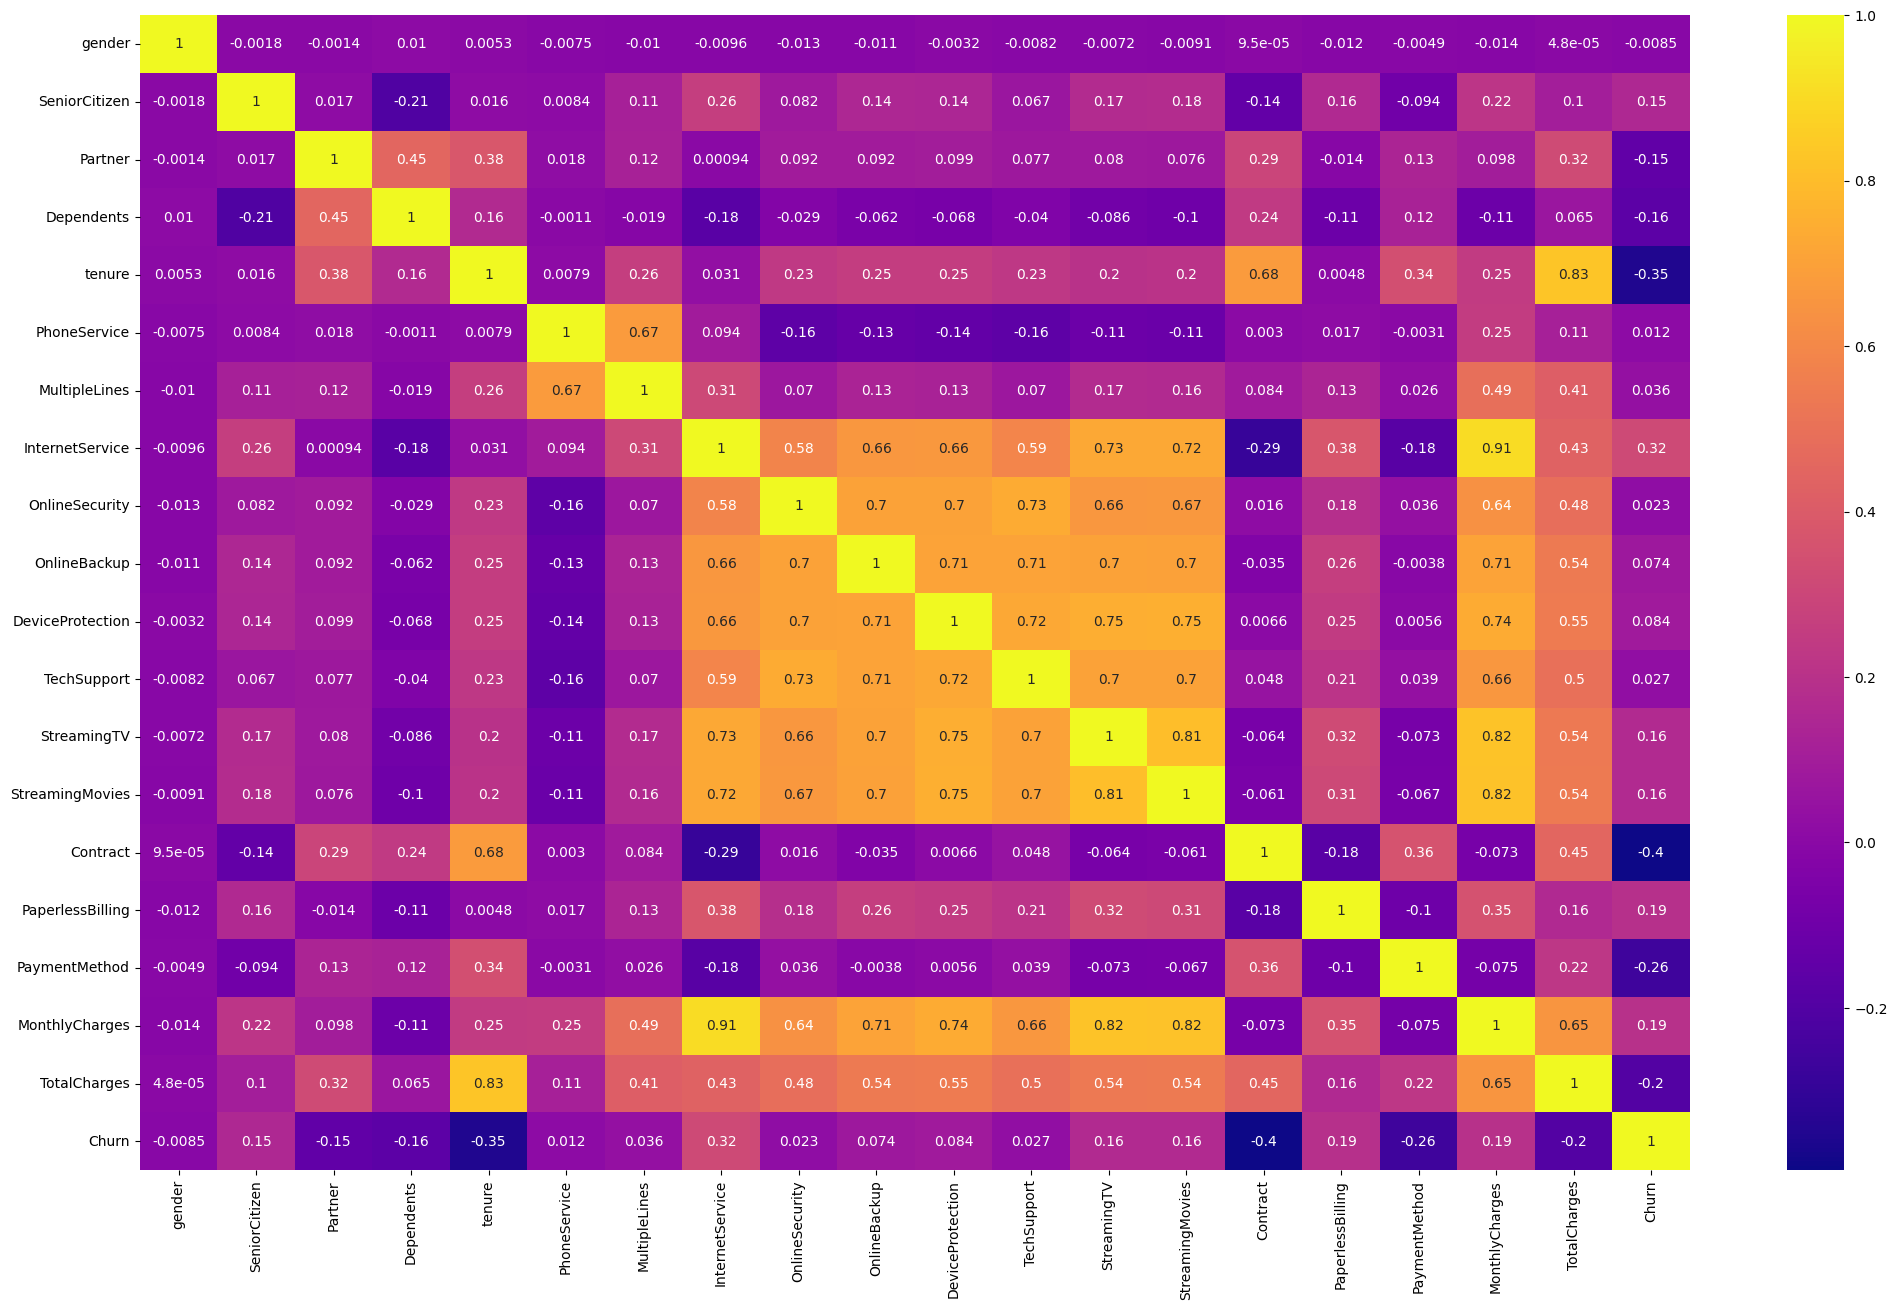

In [52]:
#Now check the heatmap
corr = df.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr,annot=True,cbar=True,cmap='plasma')
plt.show()

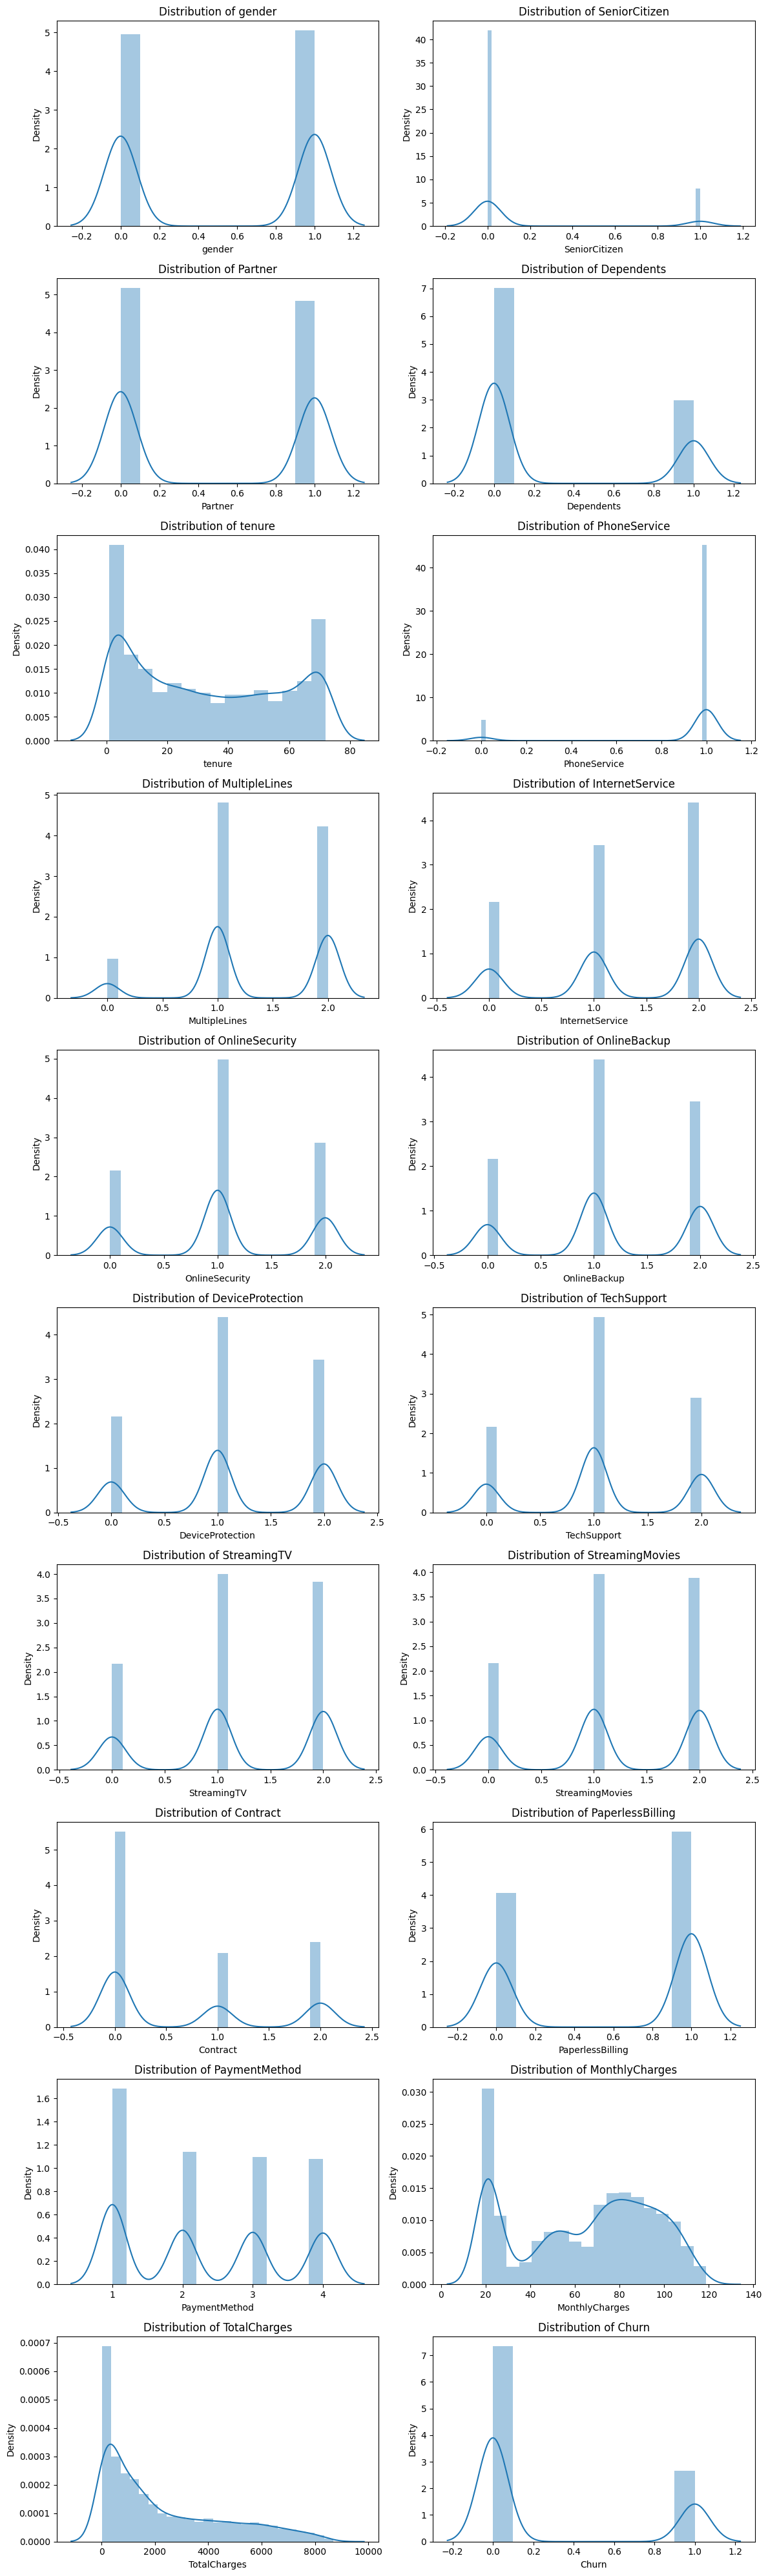

In [53]:
# Define number of columns for the subplot grid
num_cols = 2  
num_rows = -(-len(df.columns) // num_cols)  # Ceiling division to get required rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))  # Adjust size dynamically
axes = axes.flatten()  # Flatten to easily iterate

for i, col in enumerate(df.columns):
    sns.distplot(df[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Ensure proper spacing
plt.show()

In [54]:
#Checking the distributions
#check dist of all columns
#for col in df.columns:
  #plt.figure(figsize=(10,6))
 #sns.distplot(df[col])
  #plt.show()

### So the data is imbalanced. First we will apply the machine learning algorithms on this imbalanced data and check the results. After that will balance the dataset and then again apply the algorithms to witness the improvement

### Now we balance the dataset using the technique below

## Balancing Technique

In [55]:
#THIS IS A TECHNIQUE FOR OVERSAMPLING


#the data in target column is imbalanced. So we will now oversample it
#Just apply oversampling in target column

from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['Churn']==0)] 
df_minority = df[(df['Churn']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 5163, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df = pd.concat([df_minority_upsampled, df_majority])

df['Churn'].value_counts()

Churn
1    5163
0    5163
Name: count, dtype: int64

## Train Test Split, Fittings and Predictions

In [56]:
#Splitting the dataset]
x = df.drop(['Churn'],axis=1)
y = df.Churn

#Apply the train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#FEATURE SCALING
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

#model selections
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#objects
lr = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
svc = SVC()
knn = KNeighborsClassifier()
nb = GaussianNB()
lgb = LGBMClassifier()
cat = CatBoostClassifier()

#Fittings
lr.fit(x_train_scaled,y_train)
rf.fit(x_train_scaled,y_train)

RandomForestClassifier()

In [57]:
gb.fit(x_train_scaled,y_train)
xgb.fit(x_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [58]:
svc.fit(x_train_scaled,y_train)
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier()

In [59]:
nb.fit(x_train_scaled,y_train)
lgb.set_params(verbosity=-1)
lgb.fit(x_train_scaled,y_train)
cat.fit(x_train_scaled,y_train, verbose=False)

In [60]:
#preds
lrpred = lr.predict(x_test_scaled)
rfpred = rf.predict(x_test_scaled)
gbpred = gb.predict(x_test_scaled)
xgbpred = xgb.predict(x_test_scaled)
svcpred = svc.predict(x_test_scaled)
knnpred = knn.predict(x_test_scaled)
nbpred = nb.predict(x_test_scaled)
lgbpred = lgb.predict(x_test_scaled)
catpred = cat.predict(x_test_scaled)

#Evaluations
from sklearn.metrics import accuracy_score
lracc = accuracy_score(y_test,lrpred)
rfacc = accuracy_score(y_test,rfpred)
gbacc = accuracy_score(y_test,gbpred)
xgbacc = accuracy_score(y_test,xgbpred)
svcacc = accuracy_score(y_test,svcpred)
knnacc = accuracy_score(y_test,knnpred)
nbacc = accuracy_score(y_test,nbpred)
lgbacc = accuracy_score(y_test,lgbpred)
catacc = accuracy_score(y_test,catpred)

print('LOGISTIC REG',lracc)
print('RANDOM FOREST',rfacc)
print('GB',gbacc)
print('XGB',xgbacc)
print('SVC',svcacc)
print('KNN',knnacc)
print('NB',nbacc)
print('LIGHT GBM',lgbacc)
print('CATO',catacc)

LOGISTIC REG 0.776863504356244
RANDOM FOREST 0.9070667957405615
GB 0.7904162633107454
XGB 0.8688286544046466
SVC 0.7899322362052275
KNN 0.7918683446272992
NB 0.7570183930300097
LIGHT GBM 0.8407550822846079
CATO 0.8417231364956438


### These are the scores without balancing the target column

LOGISTIC REG 0.7889125799573561

RANDOM FOREST 0.7882018479033405

GB 0.7931769722814499

XGB 0.7711442786069652

SVC 0.7882018479033405

KNN 0.7448471926083866

NB 0.7192608386638237

LIGHT GBM 0.7889125799573561

CATO 0.7846481876332623

### And these are the results after balancing the dataset

LOGISTIC REG 0.776863504356244

RANDOM FOREST 0.9080348499515973

GB 0.787512100677638

XGB 0.8717328170377541

SVC 0.7913843175217812

KNN 0.7913843175217812

NB 0.7570183930300097

LIGHT GBM 0.8368828654404646

CATO 0.8484995159728945

### Which is a big improvement. Now we check the confusision matrix, classification reports and Cross val scores for the best performing model

## Confusion Matrix Heatmap

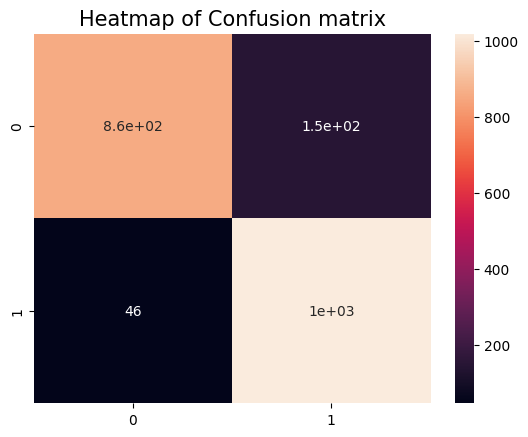

In [61]:

#NOW CHECK THE CONFUSION MATRIX(for specific model)
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,rfpred) #Enter the model pred here
plt.title('Heatmap of Confusion matrix',fontsize=15)
sns.heatmap(cm,annot=True)
plt.show()

## Classification Report

In [62]:

#NOW we will check the classification report
print(classification_report(y_test,rfpred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1002
           1       0.87      0.96      0.91      1064

    accuracy                           0.91      2066
   macro avg       0.91      0.91      0.91      2066
weighted avg       0.91      0.91      0.91      2066



## Cross Val Score

In [63]:
#(TO CHECK IF THE MODEL HAS OVERFITTED OR UNDERFITTED)

from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(estimator=rf,X=x_train_scaled,y=y_train)
print('Cross Val Acc Score of RANDOM FOREST model is ---> ',cross_val)
print('\n Cross Val Mean Acc Score of RANDOM FOREST model is ---> ',cross_val.mean())

Cross Val Acc Score of RANDOM FOREST model is --->  [0.8716707  0.90072639 0.90072639 0.88983051 0.88014528]

 Cross Val Mean Acc Score of RANDOM FOREST model is --->  0.8886198547215496


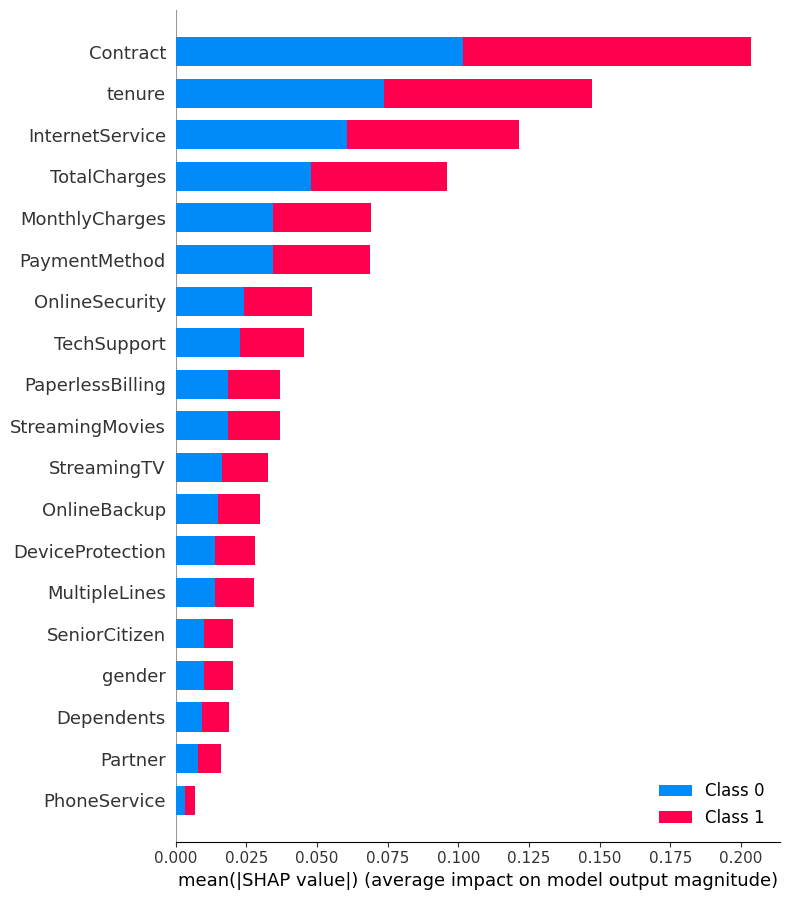

In [64]:
import shap

# Train best model (Gradient Boosting)
best_model = rf.fit(x_train_scaled, y_train)

# SHAP analysis
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(x_test_scaled)

# Summary plot
shap.summary_plot(shap_values, x_test_scaled, feature_names=x.columns, plot_type="bar")

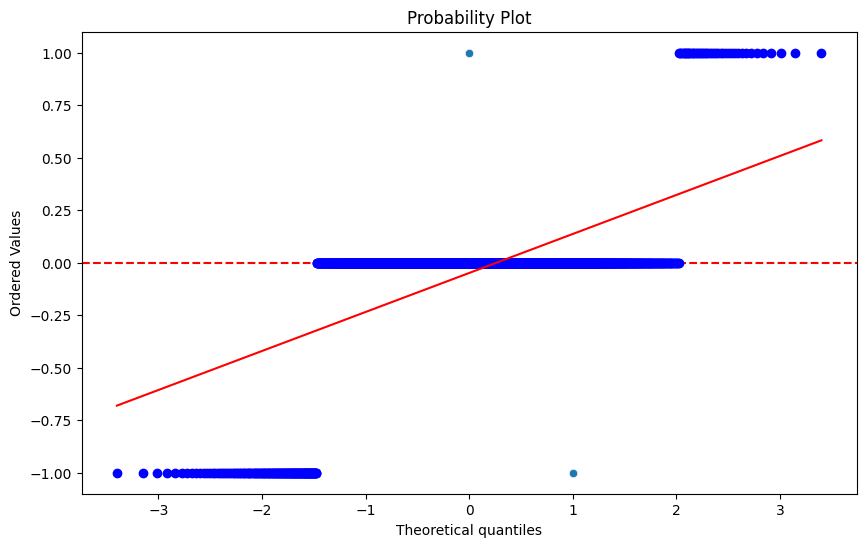

In [66]:
residuals = y_test - best_model.predict(x_test_scaled)

# Residual vs Predicted plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=best_model.predict(x_test_scaled), y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")

# Q-Q plot for normality check
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt);

In [67]:
from sklearn.metrics import mean_squared_error

# Convert RMSE to dollar terms (assuming prices are in $1,000s)
rmse_dollars = np.sqrt(mean_squared_error(y_test, best_model.predict(x_test_scaled))) * 1000
print(f"Average Prediction Error: ${rmse_dollars:,.2f}")

# Compare to median house price
median_price = np.median(y_train) * 1000
print(f"Error as % of Median Price: {rmse_dollars/median_price:.2%}")

Average Prediction Error: $302.46
Error as % of Median Price: inf%


Text(0.5, 1.0, 'Cross-Validated Predictions')

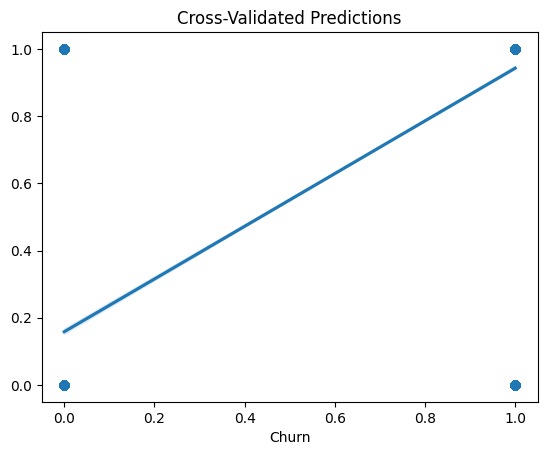

In [68]:
from sklearn.model_selection import cross_val_predict

# Get cross-val predictions with uncertainty
predictions = cross_val_predict(best_model, x_train_scaled, y_train, cv=5, method="predict")

# Plot actual vs predicted with 95% CI
sns.regplot(x=y_train, y=predictions)
plt.title("Cross-Validated Predictions")

In [65]:
#NOW save the model
import pickle
 
#Saving the model
pickle.dump(rf,open('Custormer_Churn_RF.pickle','wb'))

#loading the model 
Custormer_Churn_RF_model = pickle.load(open('Custormer_Churn_RF.pickle','rb'))

#Predicting the output
y_pred = Custormer_Churn_RF_model.predict(x_test_scaled)

#confusion matrix
print('Confusion matrix of Custormer_Churn_RF : \n', confusion_matrix(y_test,y_pred),'\n')

#showing off the accuracy score
print('Accuracy Score on testing data by svc model is ---> ',accuracy_score(y_test,y_pred))

Confusion matrix of Custormer_Churn_RF : 
 [[ 857  145]
 [  44 1020]] 

Accuracy Score on testing data by svc model is --->  0.9085188770571152
